# Flux - All About

This document gives detailed examples about flux calculations in OSCARS.

Any of these can be run in multi-threaded, GPU, or MPI mode.  Results from running on separate nodes on grid/cloud computing can be combined.

## Polarization

One can select which polarization to compute.  The default is 'all' polarizations.  One may also specify the *polarization* parameter as:
* 'linear-horizontal' or 'lh'
* 'linear-vertical'   or 'lv'
* 'circular-right'    or 'cr'
* 'circular-left'     or 'cl'

One may alternatively specify the angle of polarization of interest with respect to the horizontal direction as (for instance for 45 degrees):
* angle=45. * osr.pi() / 180.

Calculating polarization requires a definition of the horizontal and vertical directions.  The defaults for these assume the beam is in the +z direction with +x being the horizontal direction.  It is possible to change these definitions with the parameters *horizontal_direction* and *propogation_direction*

In [1]:
# matplotlib plots inline
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import OSCARS plots (matplotlib)
from oscars.plots_mpl import *

OSCARS v2.1.1 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create a new OSCARS object.  Default to 8 threads and always use the GPU if available
osr = oscars.sr.sr(nthreads=8, gpu=1)

GPU is not available: Setting gpu global setting to 0.


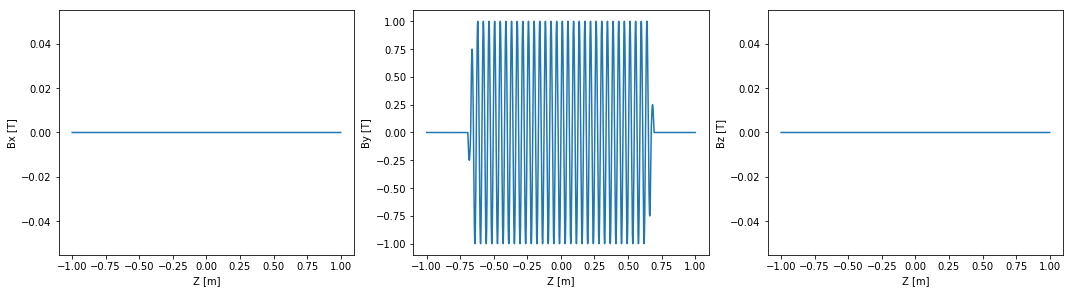

In [3]:
# For these examples we will make use of a simple undulator field
osr.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.042], nperiods=31)

# Plot the field
plot_bfield(osr)

## Beam

Add a basic beam somewhat like NSLS2.  Filament beam for simple studies.

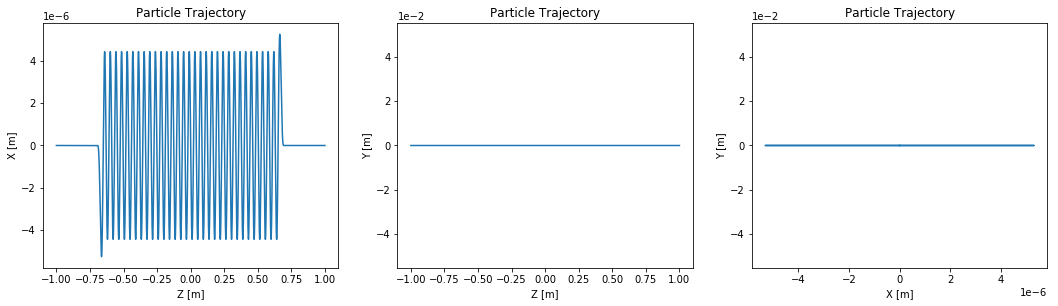

In [4]:
# Add a basic electron beam with zero emittance
osr.set_particle_beam(energy_GeV=3,
                      x0=[0, 0, -1],
                      current=0.500)

# You MUST set the start and stop time for the calculation
osr.set_ctstartstop(0, 2)

# Plot trajectory
osr.set_new_particle()
plot_trajectory_position(osr.calculate_trajectory())

## Spectrum

Calculate the spectrum so we can pick what energy we want to look at in the 2D flux maps

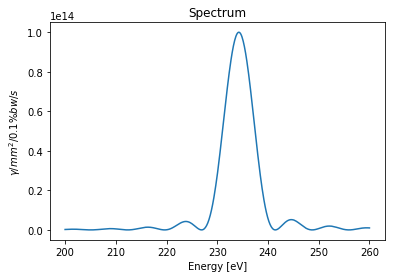

In [5]:
# Evenly spaced spectrum in an energy range
spectrum = osr.calculate_spectrum(obs=[0, 0, 30], energy_range_eV=[200, 260], npoints=500)
plot_spectrum(spectrum)

## Flux on Rectangular surface

First let's look at a simple flux on a rectangular surface

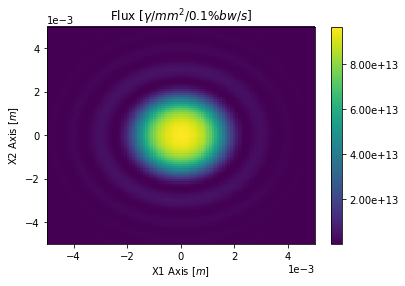

In [6]:
# Calculate flux on rectangular surface
# Here we essentially create a rectanglular surface in the XY plane, then translate
# it 30m downstream
flux = osr.calculate_flux_rectangle(plane='XY',
                                    energy_eV=235,
                                    width=[0.01, 0.01],
                                    npoints=[101, 101],
                                    translation=[0, 0, 30])
plot_flux(flux)

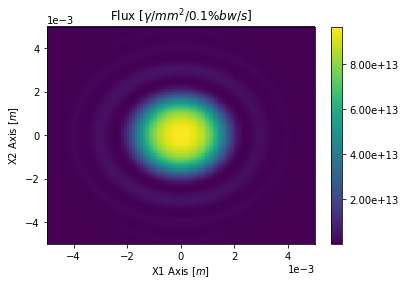

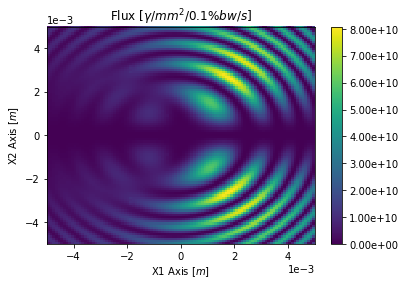

In [7]:
# Calculate linear horizontal and linear vertical polarizations
flux = osr.calculate_flux_rectangle(plane='XY',
                                    energy_eV=235,
                                    width=[0.01, 0.01],
                                    npoints=[101, 101],
                                    translation=[0, 0, 30],
                                    polarization='lh'
                                   )
plot_flux(flux)

flux = osr.calculate_flux_rectangle(plane='XY',
                                    energy_eV=235,
                                    width=[0.01, 0.01],
                                    npoints=[101, 101],
                                    translation=[0, 0, 30],
                                    polarization='lv'
                                   )
plot_flux(flux)

## Multi-particle flux

### Non-zero emittance beam

In [8]:
# Add a basic electron beam with zero emittance
osr.set_particle_beam(type='electron',
                      energy_GeV=3,
                      x0=[0, 0, -1],
                      current=0.500,
                      sigma_energy_GeV=0.001*3,
                      beta=[1.5, 0.8],
                      emittance=[0.9e-9, 0.008e-9])

# You MUST set the start and stop time for the calculation
osr.set_ctstartstop(0, 2)

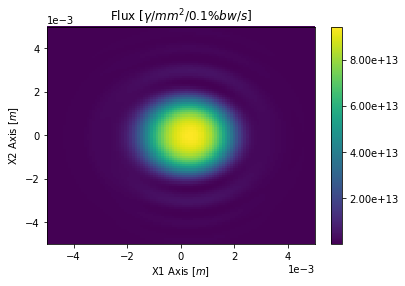

In [9]:
# Calculate flux on rectangular surface
# Here we can set nparticle equal to the number of desired particles to use
flux = osr.calculate_flux_rectangle(plane='XY',
                                    energy_eV=235,
                                    width=[0.01, 0.01],
                                    npoints=[101, 101],
                                    translation=[0, 0, 30],
                                    nparticles=3)
plot_flux(flux)